In [1]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
# from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix

import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the pre-extracted features from the .npy files into separate arrays
# actor1_features = np.load('features_countvec/train_countvec_features_actor_1_name.npy')
# actor2_features = np.load('features_countvec/train_countvec_features_actor_2_name.npy')
# director_features = np.load('features_countvec/train_countvec_features_director_name.npy')
# plot_features = np.load('features_doc2vec/train_doc2vec_features_plot_keywords.npy')
# title_features = np.load('features_fasttext/train_fasttext_title_embeddings.npy')

In [3]:
# Read dataset, adjust column names to string type, and drop specified columns
df = pd.read_csv('train_dataset.csv')
# df = pd.concat((df, pd.DataFrame(actor1_features), pd.DataFrame(actor2_features), pd.DataFrame(director_features), pd.DataFrame(plot_features), pd.DataFrame(title_features)), axis=1)
df.columns = df.columns.astype(str)
df = df.drop([
    'director_name', 'genres', 'actor_1_name', 'actor_2_name', 
    'plot_keywords', 'movie_title', 'actor_3_name', 'language', 
    'country', 'content_rating', 'title_embedding'
], axis=1)
df

,id,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,movie_facebook_likes,average_degree_centrality,imdb_score_binned
0,1,186,73,28,847,2000,422783777,644348,6458,0,656,1994,886,17000,0.001576,4
1,2,252,97,0,233,654,20433940,78883,1876,8,662,2005,529,0,0.000675,2
2,3,232,117,234,221,12000,371897,36494,13607,2,118,2013,1000,11000,0.003002,2
3,4,297,109,0,145,957,13782838,258078,1757,0,911,1982,163,23000,0.001726,4
4,5,297,171,0,857,16000,313837577,1238746,22342,2,5060,2001,5000,21000,0.001876,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,3000,161,129,42,49,97,93952276,132048,318,7,203,2009,50,12000,0.000750,2
3000,3001,393,123,2000,471,26000,26903709,312629,37206,0,475,2013,10000,83000,0.003302,4
3001,3002,216,118,473,963,18000,73343413,217480,22517,0,429,2009,1000,21000,0.003302,3
3002,3003,109,95,0,0,227,1060591,9750,231,0,66,2007,4,0,0.000300,3


In [4]:
# Check for missing values in each column
df.isnull().sum()

id                           0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_1_facebook_likes       0
gross                        0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
num_user_for_reviews         0
title_year                   0
actor_2_facebook_likes       0
movie_facebook_likes         0
average_degree_centrality    0
imdb_score_binned            0
dtype: int64

In [5]:
# Look at summary statistics
df.describe()

,id,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,movie_facebook_likes,average_degree_centrality,imdb_score_binned
count,3004.00000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3.004000e+03,3.004000e+03,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000
mean,1502.50000,165.609188,110.076565,778.890146,767.860186,7654.935752,5.187733e+07,1.049017e+05,11391.643808,1.380826,335.922770,2002.782956,1992.843209,8972.179427,0.001739,2.250333
std,867.32443,121.254549,21.910608,2990.741946,1901.991202,16488.761947,6.840156e+07,1.508573e+05,20044.723195,2.093417,415.219466,10.086250,4651.072554,19853.888300,0.001183,0.691451
min,1.00000,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.000000,4.000000,1929.000000,0.000000,0.000000,0.000300,0.000000
25%,751.75000,76.000000,96.000000,10.000000,191.000000,728.500000,8.579684e+06,1.897825e+04,1873.000000,0.000000,108.000000,1999.000000,377.750000,0.000000,0.000825,2.000000
50%,1502.50000,137.000000,106.000000,62.500000,433.000000,1000.000000,3.020586e+07,5.387400e+04,3889.000000,1.000000,208.000000,2004.000000,664.000000,241.000000,0.001426,2.000000
75%,2253.25000,223.000000,120.000000,234.000000,683.000000,12000.000000,6.647359e+07,1.284895e+05,15925.250000,2.000000,398.000000,2010.000000,970.000000,11000.000000,0.002401,3.000000
max,3004.00000,813.000000,330.000000,23000.000000,23000.000000,640000.000000,6.586723e+08,1.689764e+06,656730.000000,43.000000,5060.000000,2016.000000,137000.000000,197000.000000,0.007354,4.000000


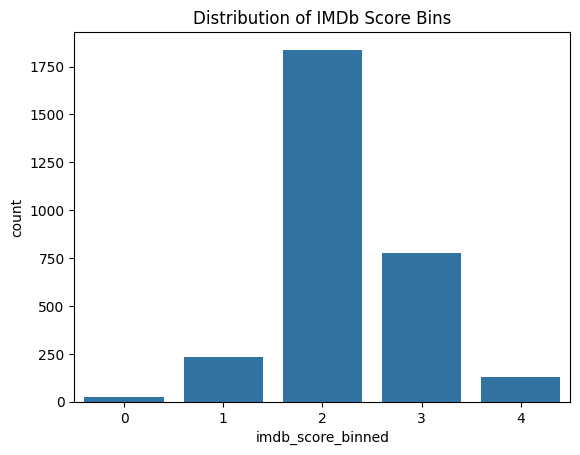

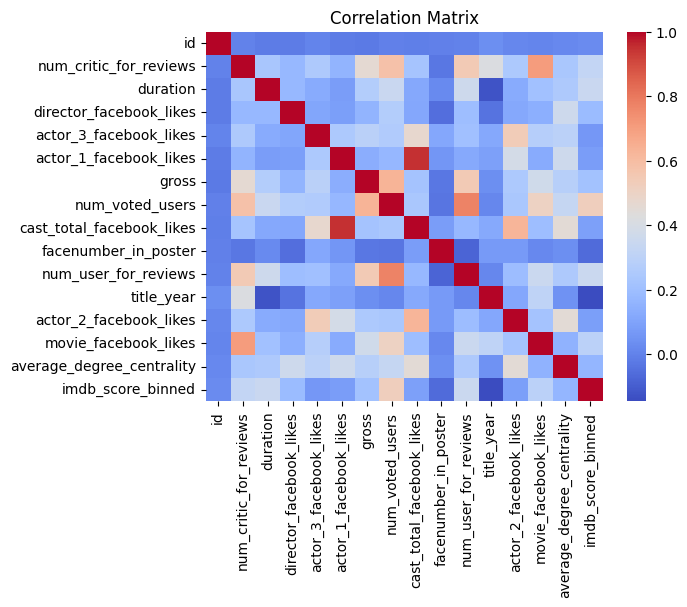

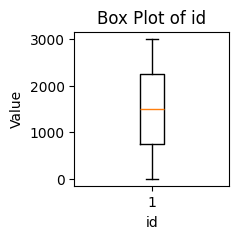

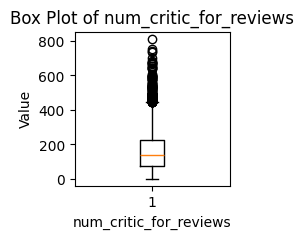

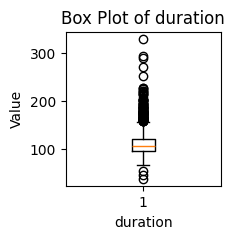

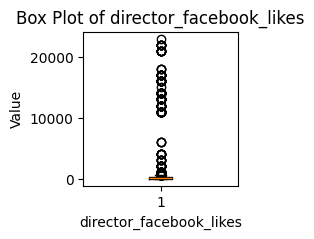

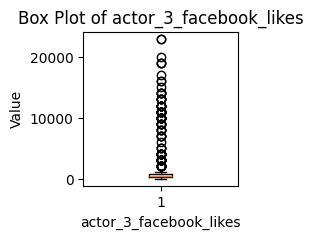

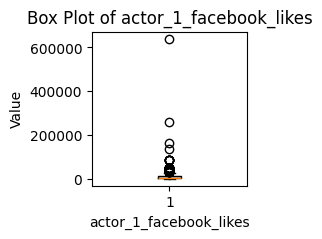

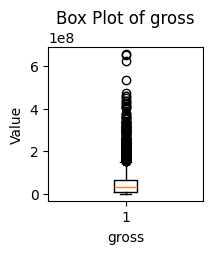

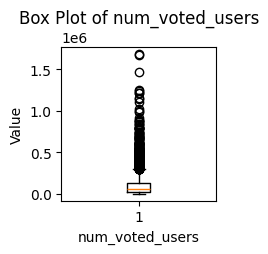

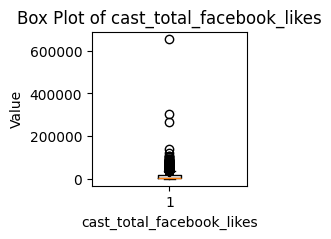

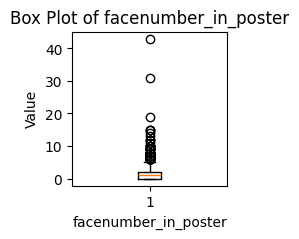

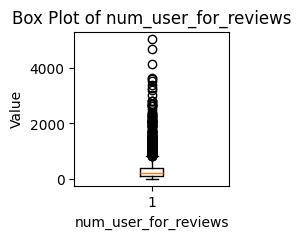

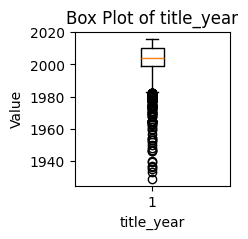

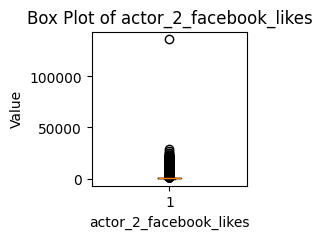

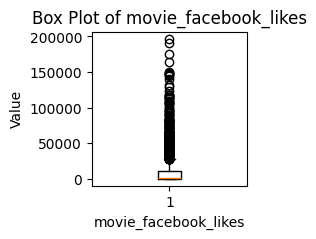

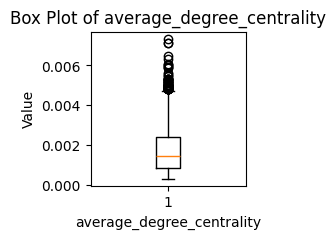

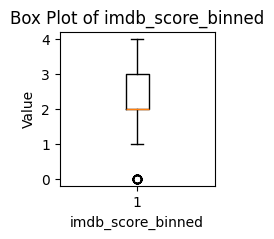

In [6]:
# Visualize IMDb score distribution, feature correlations, and numeric feature distributions
sns.countplot(x='imdb_score_binned', data=df)
plt.title('Distribution of IMDb Score Bins')
plt.show()

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

for feature in df.columns:
    if pd.api.types.is_numeric_dtype(df[feature]):
        plt.figure(figsize=(2, 2))
        plt.boxplot(df[feature])
        plt.xlabel(feature)
        plt.ylabel("Value")
        plt.title(f"Box Plot of {feature}")
        plt.show()

In [7]:
# df_0_1_4 = df[df['imdb_score_binned'].isin([0, 1, 4])]
# df_2_3 = df[df['imdb_score_binned'].isin([2, 3])]
# df_2_3_zscores = df_2_3.apply(zscore)
# df_2_3_filtered = df_2_3[(np.abs(df_2_3_zscores) < 3.5).all(axis=1)]
# df_cleaned = pd.concat([df_0_1_4, df_2_3_filtered])

In [8]:
# # Visualize IMDb score distribution, feature correlations, and numeric feature distributions after further cleaning
# sns.countplot(x='imdb_score_binned', data=df)
# plt.title('Distribution of IMDb Score Bins')
# plt.show()

# correlation_matrix = df.corr()
# sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

# for feature in df.columns:
#     if pd.api.types.is_numeric_dtype(df[feature]):
#         plt.figure(figsize=(2, 2))
#         plt.boxplot(df[feature])
#         plt.xlabel(feature)
#         plt.ylabel("Value")
#         plt.title(f"Box Plot of {feature}")
#         plt.show()

In [9]:
# Load test dataset, convert column names to string type, and drop specified columns
test_df = pd.read_csv('test_dataset.csv')

# actor1_features = np.load('features_countvec/test_countvec_features_actor_1_name.npy')
# actor2_features = np.load('features_countvec/test_countvec_features_actor_2_name.npy')
# director_features = np.load('features_countvec/test_countvec_features_director_name.npy')
# plot_features = np.load('features_doc2vec/test_doc2vec_features_plot_keywords.npy')
# title_features = np.load('features_fasttext/test_fasttext_title_embeddings.npy')

# test_df = pd.concat((test_df, pd.DataFrame(actor1_features), pd.DataFrame(actor2_features), pd.DataFrame(director_features), pd.DataFrame(plot_features), pd.DataFrame(title_features)), axis=1)

test_df.columns = test_df.columns.astype(str)

test_df = test_df.drop([
    'director_name', 'genres', 'actor_1_name', 'actor_2_name',
    'plot_keywords', 'movie_title', 'actor_3_name', 'language',
    'country', 'content_rating', 'title_embedding'
], axis=1)

In [10]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# X_test_scaled = scaler.transform(test_df)

In [11]:
# Split dataset into features and target, then into training and validation sets; scale the features
X = df.drop('imdb_score_binned', axis=1)
y = df['imdb_score_binned']
X_weighted = df.drop('imdb_score_binned', axis=1)
y_weighted = df['imdb_score_binned']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1003)
X_train_weighted, X_val_weighted, y_train_weighted, y_val_weighted = train_test_split(X_weighted, y_weighted, test_size=0.3, random_state=1003)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_train_weighted = scaler.transform(X_train_weighted)
X_val_weighted = scaler.transform(X_val_weighted)
X_test = scaler.transform(test_df)

In [12]:
# nb = MultinomialNB()

# nb.fit(X_train + abs(X_train.min()), y_train)

# y_pred = nb.predict(X_val + abs(X_val.min()))

# print("Accuracy:", accuracy_score(y_val, y_pred))

In [13]:
# knn = KNeighborsClassifier(n_neighbors=40)

# knn.fit(X_train, y_train)

# y_pred = knn.predict(X_val)

# print("Accuracy:", accuracy_score(y_val, y_pred))

In [14]:
# Train SVM model, make predictions on validation data, and evaluate accuracy
svm = SVC(random_state=1003)

svm.fit(X_train, y_train)

y_pred = svm.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.6917960088691796


In [15]:
# Train SVM with balanced class weights, make predictions on validation data, and evaluate accuracy
svm_balanced = SVC(random_state=1003, class_weight='balanced')

svm_balanced.fit(X_train, y_train)

y_pred = svm_balanced.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.4024390243902439


In [16]:
# nn = MLPClassifier(random_state=1003, alpha=0.0601)

# nn.fit(X_train, y_train)

# y_pred = nn.predict(X_val)

# print("Accuracy:", accuracy_score(y_val, y_pred))

In [17]:
# alphas = [0.0001 + 0.005 * i for i in range(20)]

# for alpha in alphas:
# 	nn = MLPClassifier(random_state=1003, alpha=alpha)
	
# 	nn.fit(X_train, y_train)
	
# 	y_pred = nn.predict(X_test)
	
# 	accuracy = accuracy_score(y_test, y_pred)
	
# 	print(f"Alpha: {alpha:.5f}, Accuracy: {accuracy:.7f}")

In [18]:
# from sklearn.linear_model import SGDClassifier

# sgd = SGDClassifier(loss='log_loss', penalty='l1', max_iter=1000, random_state=1003)

# sgd.fit(X_train, y_train)

# y_pred = sgd.predict(X_val)

# print("Accuracy:", accuracy_score(y_val, y_pred))

In [19]:
# lr = LogisticRegression(random_state=1003, penalty=None)

# lr.fit(X_train, y_train)

# y_pred = lr.predict(X_val)

# print("Accuracy:", accuracy_score(y_val, y_pred))

In [20]:
# rc = RidgeClassifier(random_state=1003)

# rc.fit(X_train, y_train)

# y_pred = rc.predict(X_val)

# print("Accuracy:", accuracy_score(y_val, y_pred))

In [21]:
# Train Random Forest model, make predictions on validation data, and evaluate accuracy
rf = RandomForestClassifier(
    n_estimators=18,
    max_depth=17,
    random_state=1003,
)

rf.fit(X_train_weighted, y_train_weighted)

y_pred = rf.predict(X_val_weighted)

print("Accuracy:", accuracy_score(y_val_weighted, y_pred))

Accuracy: 0.6995565410199557


In [22]:
# Train Random Forest model with balanced class weights, make predictions on validation data, and evaluate accuracy
rf = RandomForestClassifier(
    class_weight='balanced',
    n_estimators=18,
    max_depth=17,
    random_state=1003,
)

rf.fit(X_train_weighted, y_train_weighted)

y_pred = rf.predict(X_val_weighted)

print("Accuracy:", accuracy_score(y_val_weighted, y_pred))

Accuracy: 0.7106430155210643


In [23]:
# dt = DecisionTreeClassifier(random_state=1003)

# dt.fit(X_train_weighted, y_train_weighted)

# y_pred = dt.predict(X_val_weighted)

# print("Accuracy:", accuracy_score(y_val_weighted, y_pred))

In [24]:
# Train Gradient Boosting model, make predictions on validation data, and evaluate accuracy
gb = GradientBoostingClassifier(random_state=1003, n_estimators=45)

gb.fit(X_train_weighted, y_train_weighted)

y_pred = gb.predict(X_val_weighted)

print("Accuracy:", accuracy_score(y_val_weighted, y_pred))

Accuracy: 0.7217294900221729


In [25]:
# Train AdaBoost model, make predictions on validation data, and evaluate accuracy
ada = AdaBoostClassifier(
    estimator=rf,
    n_estimators=18,
    random_state=1003,
    algorithm='SAMME'
)

ada.fit(X_train_weighted, y_train_weighted)

y_pred = ada.predict(X_val_weighted)

print("Accuracy:", accuracy_score(y_val_weighted, y_pred))

Accuracy: 0.6962305986696231


In [26]:
# Train VotingClassifier ensemble, make predictions on validation data, and evaluate accuracy
models = [('rf', rf), ('gb', gb), ('svm', svm), ('ada', ada)]

ensemble = VotingClassifier(estimators=models, voting='hard')

ensemble.fit(X_train, y_train)

y_pred = ensemble.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))

Accuracy: 0.7117516629711752


In [27]:
# Perform 8-fold cross-validation on each model and print the results
models = {"SVM": svm, "Random Forest": rf, "Gradient Boosting": gb, "AdaBoost": ada, "Ensemble": ensemble}

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=8)
    print(f"{model_name} Cross-Validation Scores: {cv_scores}")
    print(f"{model_name} Mean CV Accuracy: {cv_scores.mean()}")
    print(f"{model_name} Standard Deviation of Accuracy: {cv_scores.std()}\n")

SVM Cross-Validation Scores: [0.67680608 0.69961977 0.66920152 0.66539924 0.64638783 0.70342205
 0.63358779 0.66793893]
SVM Mean CV Accuracy: 0.670295402432299
SVM Standard Deviation of Accuracy: 0.022218870148101776

Random Forest Cross-Validation Scores: [0.67680608 0.67680608 0.69201521 0.63498099 0.69581749 0.7148289
 0.67175573 0.69465649]
Random Forest Mean CV Accuracy: 0.6822083708240212
Random Forest Standard Deviation of Accuracy: 0.02207512584105343

Gradient Boosting Cross-Validation Scores: [0.70722433 0.68441065 0.68441065 0.69961977 0.68060837 0.74524715
 0.64885496 0.71755725]
Gradient Boosting Mean CV Accuracy: 0.6959916407859983
Gradient Boosting Standard Deviation of Accuracy: 0.026826451234130664

AdaBoost Cross-Validation Scores: [0.6730038  0.69201521 0.68060837 0.6730038  0.64258555 0.71863118
 0.67175573 0.70992366]
AdaBoost Mean CV Accuracy: 0.6826909122572781
AdaBoost Standard Deviation of Accuracy: 0.02247304922652891

Ensemble Cross-Validation Scores: [0.6768

In [28]:
# Load training dataset, prepare features and target variable, fill missing values, and transform features
df = pd.read_csv('train_dataset.csv')

# df = pd.concat((df, pd.DataFrame(actor1_features), pd.DataFrame(actor2_features), pd.DataFrame(director_features), pd.DataFrame(plot_features), pd.DataFrame(title_features)), axis=1)

df.columns = df.columns.astype(str)

df_x = df.drop([
    'director_name', 'genres', 'actor_1_name', 'actor_2_name',
    'plot_keywords', 'movie_title', 'actor_3_name', 'language',
    'country', 'content_rating', 'title_embedding', 'imdb_score_binned'
], axis=1)

df_x.fillna(df_x.median(), inplace=True)

df_y = df['imdb_score_binned']

df_x = scaler.transform(df_x)

In [29]:
# Calculate accuracy scores for the entire dataset using different models
whole_accuracy_scores = [
    accuracy_score(df_y, svm.predict(df_x)),  # Support Vector Machine
    accuracy_score(df_y, rf.predict(df_x)),  # Random Forest
    accuracy_score(df_y, gb.predict(df_x)),  # Gradient Boosting
    accuracy_score(df_y, ada.predict(df_x)),  # AdaBoost Classifier
    accuracy_score(df_y, ensemble.predict(df_x)), # Ensemble Classifier
]

# Calculate accuracy scores for the training set using different models
train_accuracy_scores = [
    accuracy_score(y_train, svm.predict(X_train)),  # Support Vector Machine
    accuracy_score(y_train, rf.predict(X_train)),  # Random Forest
    accuracy_score(y_train, gb.predict(X_train)),  # Gradient Boosting
    accuracy_score(y_train, ada.predict(X_train)),  # AdaBoost Classifier
    accuracy_score(y_train, ensemble.predict(X_train)), # Ensemble Classifier
]

# Calculate accuracy scores for the validation set using different models
test_accuracy_scores = [
    accuracy_score(y_val, svm.predict(X_val)),  # Support Vector Machine
    accuracy_score(y_val, rf.predict(X_val)),  # Random Forest
    accuracy_score(y_val, gb.predict(X_val)),  # Gradient Boosting
    accuracy_score(y_val, ada.predict(X_val)),  # AdaBoost Classifier
    accuracy_score(y_val, ensemble.predict(X_val)), # Ensemble Classifier
]

# Create a dictionary to store the model names and their corresponding accuracy scores
model_accuracies = {
    "Model": ["Support Vector Machine", "Random Forest", "Gradient Boosting", "AdaBoost Classifier", "Ensemble Classifier"],
    "Train Accuracy": train_accuracy_scores,
    "Validate Accuracy": test_accuracy_scores,
    "Overall Accuracy": whole_accuracy_scores,
}

df_models = pd.DataFrame(model_accuracies)
df_models

,Model,Train Accuracy,Validate Accuracy,Overall Accuracy
0,Support Vector Machine,0.690771,0.691796,0.691079
1,Random Forest,0.997146,0.710643,0.911119
2,Gradient Boosting,0.813035,0.721729,0.785619
3,AdaBoost Classifier,1.000000,0.696231,0.908788
4,Ensemble Classifier,0.895814,0.711752,0.840546


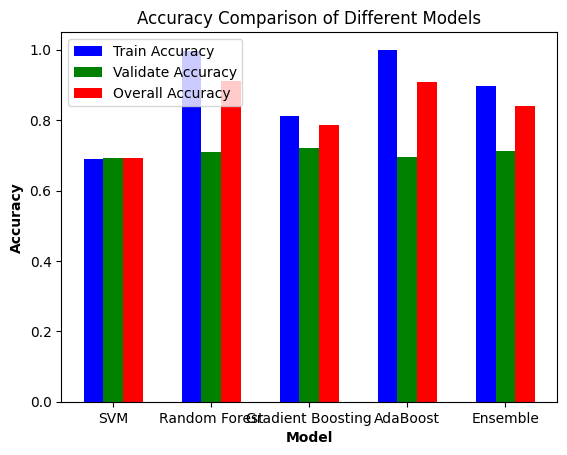

In [30]:
# Plot training, validation, and overall accuracy scores for each model
model_names = ["SVM", "Random Forest", "Gradient Boosting", "AdaBoost", "Ensemble"]

r1 = np.arange(len(train_accuracy_scores))
r2 = [x + 0.2 for x in r1]
r3 = [x + 0.2 for x in r2]

plt.bar(r1, train_accuracy_scores, color='b', width=0.2, label='Train Accuracy')
plt.bar(r2, test_accuracy_scores, color='g', width=0.2, label='Validate Accuracy')
plt.bar(r3, whole_accuracy_scores, color='r', width=0.2, label='Overall Accuracy')

plt.xlabel('Model', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.title('Accuracy Comparison of Different Models')
plt.xticks([r + 0.2 for r in range(len(train_accuracy_scores))], model_names)
plt.legend()
plt.show()

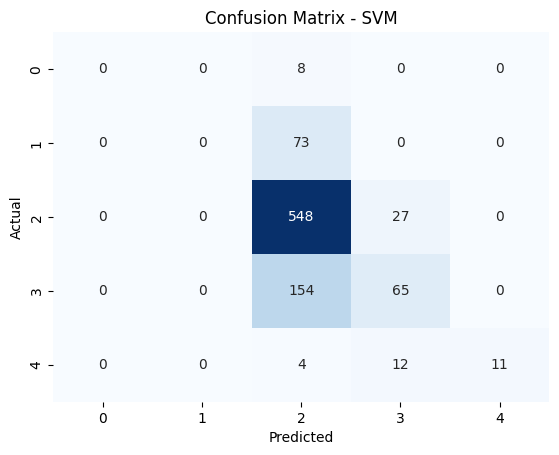

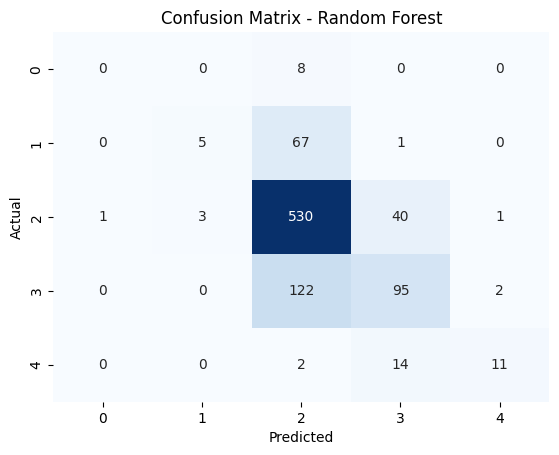

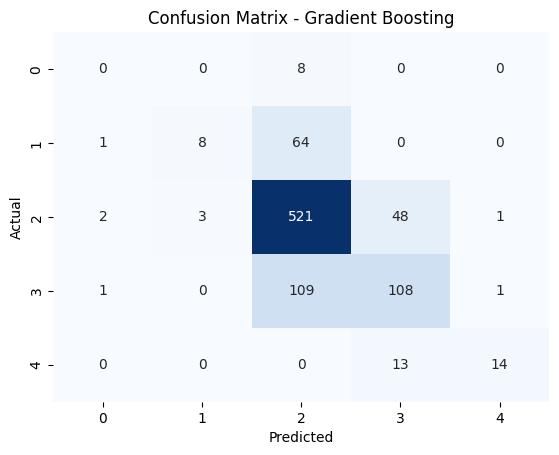

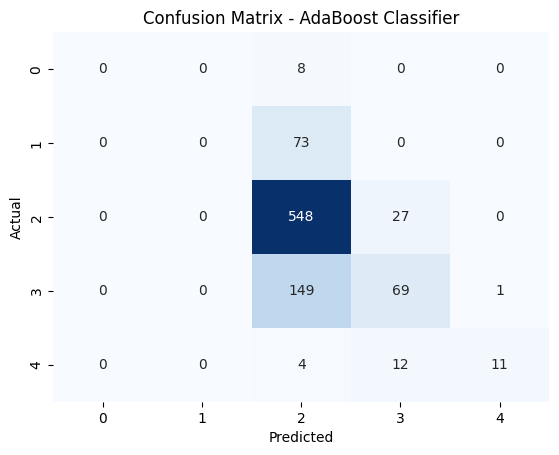

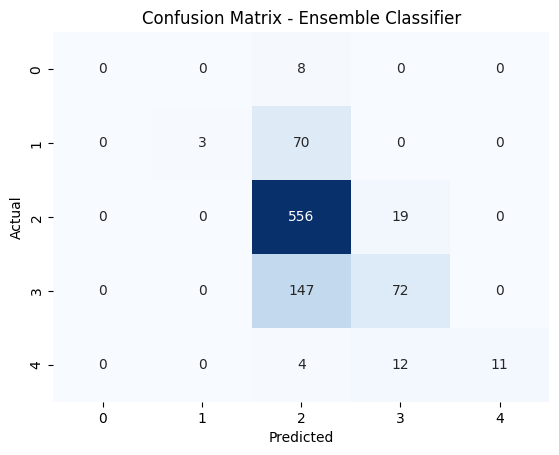

In [31]:
# Plot confusion matrices for validation set predictions using different models
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

y_val_pred_svm = svm.predict(X_val)
y_val_pred_rf = rf.predict(X_val)
y_val_pred_gb = gb.predict(X_val)
y_val_pred_ada = ada.predict(X_val)
y_val_pred_ensemble = ensemble.predict(X_val)

plot_confusion_matrix(y_val, y_val_pred_svm, "Confusion Matrix - SVM")
plot_confusion_matrix(y_val, y_val_pred_rf, "Confusion Matrix - Random Forest")
plot_confusion_matrix(y_val, y_val_pred_gb, "Confusion Matrix - Gradient Boosting")
plot_confusion_matrix(y_val, y_val_pred_ada, "Confusion Matrix - AdaBoost Classifier")
plot_confusion_matrix(y_val, y_val_pred_ensemble, "Confusion Matrix - Ensemble Classifier")